In [123]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
from scipy import optimize

In [143]:
SDR = []

theta_arr = np.arange(0.5,1.5,0.05)

for theta in theta_arr:
    r = np.load('./Data-{}.npz'.format(theta), allow_pickle=True)['r']
    SDR.append(r)
    
avg_error = np.array([np.sqrt(np.mean((rr-SDR[0])**2)) for rr in SDR])
SDT = np.load('./TimeAnalysis.npz', allow_pickle=True)['runtime']
th = np.load('./TimeAnalysis.npz', allow_pickle=True)['θ']
    

In [184]:
def f(theta, interp_avg_err, interp_comp_time):
    return interp_avg_err(theta) - interp_comp_time(theta)

theta = np.arange(0.5,1.45,0.001)

normed_avg_error = (avg_error - np.min(avg_error))/(avg_error.max() - avg_error.min())
normed_comp_time = (SDT - np.min(SDT))/(SDT.max() - SDT.min())
interp_avg_err = interp1d(theta_arr,normed_avg_error)
interp_comp_time = interp1d(theta_arr,normed_comp_time)

root = optimize.bisect(f, 0.5, 1.3, args=(interp_avg_err, interp_comp_time))
print(root)

0.6872040025729802


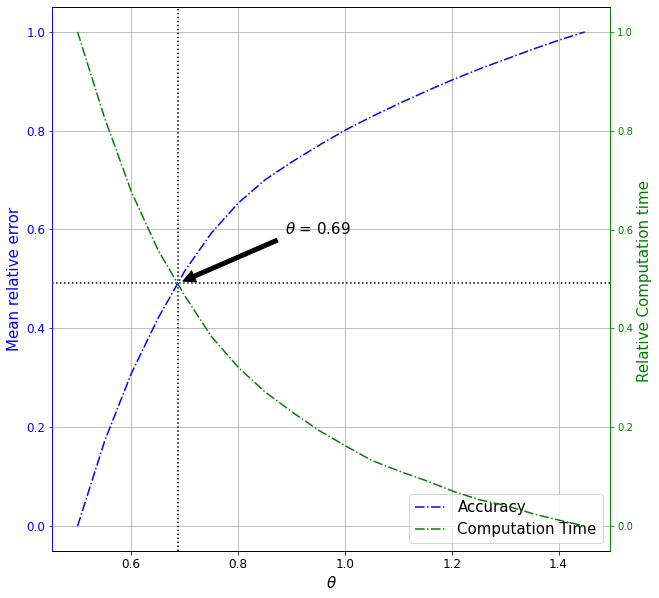

In [182]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

lns1 = ax1.plot(theta, interp_avg_err(theta), linestyle='-.', color='blue',label='Accuracy')
ax1.set_xlabel(r'$\theta$',fontsize=15)
ax1.set_ylabel('Mean relative error',fontsize=15)
ax1.grid()
ax1.axhline(y=interp_avg_err(root), color= 'black', linestyle='dotted')
ax1.axvline(x=root, color= 'black', linestyle='dotted')
ax1.annotate(r'$\theta$ = {:.2f}'.format(root), xy=(root, interp_avg_err(root)), xytext=(root+.2, interp_avg_err(root)+.1),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15
            )

ax1.tick_params(axis='y', colors='blue')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')
ax1.spines['left'].set_color('blue')
ax1.spines['right'].set_color('green')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)

ax2 = ax1.twinx()

lns2 = ax2.plot(theta, interp_comp_time(theta), linestyle='-.', color='green',label='Computation Time')
ax2.set_xlabel(r'$\theta$',fontsize=15)
ax2.set_ylabel('Relative Computation time ',fontsize=15)

ax2.yaxis.label.set_color('green')
ax2.tick_params(axis='y', colors='green')
ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('green')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0,fontsize=15)
#fig.legend(['Accuracy','Candidate','' ,'Computation Time'])
plt.title("")
plt.savefig('Theta_analysis.pdf')

In [ ]:
fig = plt.figure(figsize=(10,10),constrained_layout=True)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])

ax1.plot(avg_error,theta_arr, linestyle='-.', color='black')
ax1.set_xlabel('Mean relative error')
ax1.set_ylabel(r'$\theta$')
ax1.set_xscale('log')
ax1.grid()
ax1.axvline(x=avg_error[np.where(np.round(theta_arr,2) == 0.75)[0][0]], ymin = transform(0.5), ymax=transform(1.45), color= 'red', linestyle='dotted')
ax1.axhline(y=0.75, color= 'red', linestyle='dotted')
ax2 = ax1.twinx()
ax2.plot(SDT/SDT[0],theta_arr, linestyle='-.', color='black')
ax2.set_xlabel('Relative Computation time ')
ax2.set_ylabel(r'$\theta$')
ax2.set_xscale('log')
ax2.grid()
ax2.axvline(x=(SDT/SDT[0])[np.where(np.round(theta_arr,2) == 0.75)[0][0]], color= 'red', linestyle='dotted')
ax2.axhline(y=0.75, color= 'red', linestyle='dotted')